In [ ]:
# Dữ liệu số ca nhiễm covid vào ngày 01 tháng 3 năm 2021 trên toàn thế giới
#kiểm tra châu nào có ca nhiễm nhiều nhất, số người chết nhiều nhất, tỷ lệ người trên 70 cao nhất
#kiểm tra châu nào có ca nhiễm ít nhất,...
# trong châu có ca nhiều nhất thì tìm nước có ca nhiễm nhiều nhất, chết nhiều nhất, và ít nhất
#tìm mô hình hồi quy giữa tỷ lệ chết với tỉ lệ ca nhiễm trên 70 tuổi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('covid_data.csv')
data.info()
data.dropna(how="all", inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  173 non-null    object 
 1   location                  173 non-null    object 
 2   continent                 173 non-null    object 
 3   total_cases               173 non-null    int64  
 4   total_cases_per_million   173 non-null    float64
 5   total_deaths              173 non-null    int64  
 6   total_deaths_per_million  173 non-null    float64
 7   population                173 non-null    int64  
 8   aged_70_older             173 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


<AxesSubplot:>

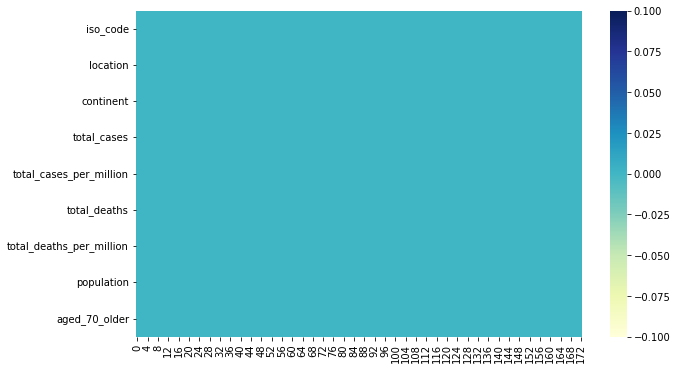

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(), cmap='YlGnBu')

In [22]:
# location -> tên quốc gia được thống kê
# continent -> châu lục
# total_cases -> tổng số ca nhiễm được thống kê cho tới tháng 01/03/2021
# total_deaths -> tổng số ca tử vong do covid19 được thống kê cho tới tháng 01/03/2021
# population -> dân số tính tới tháng 3 năm 2021
# aged_70_older -> tỉ lệ phần trăm dân số trên 70 tuổi
data['population_70_older'] = round(data['aged_70_older']*data['population']/100)
data[['location', 'continent', 'total_cases', 'total_deaths', 'population', 'population_70_older', 'death_rate']]

,location,continent,total_cases,total_deaths,population,population_70_older,death_rate
0,Afghanistan,Asia,55733,2444,38928341,520472.0,0.043852
1,Albania,Europe,107931,1816,2877800,248728.0,0.016826
2,Algeria,Africa,113255,2987,43851043,1691335.0,0.026374
3,Angola,Africa,20854,508,32866268,447639.0,0.024360
4,Antigua and Barbuda,North America,769,14,97928,4535.0,0.018205
...,...,...,...,...,...,...,...
168,Venezuela,South America,139545,1348,28435943,1113267.0,0.009660
169,Vietnam,Asia,2448,35,97338583,4592434.0,0.014297
170,Yemen,Asia,2310,634,29825968,472145.0,0.274459
171,Zambia,Africa,79002,1098,18383956,283481.0,0.013898


In [31]:
#Tổng số ca nhiễm tính tới ngày 01/03/2021
sum(data['total_cases'])


113863086

In [32]:
# Tổng số ca tử vong tính tới ngày 01/03/2021
sum(data['total_deaths'])

2532633

<AxesSubplot:xlabel='location', ylabel='total_cases'>

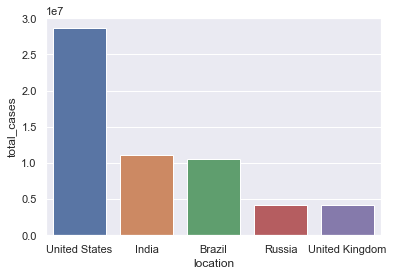

In [29]:
#top 5 quốc gia số ca nhiễm cao nhất
data_desc_cases = data.sort_values(by='total_cases', ascending=False)
top_5th = data_desc_cases.head(5)
top_5th[['location','total_cases']]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="location", y='total_cases', data=top_5th, ci=0)


<AxesSubplot:xlabel='location', ylabel='total_deaths'>

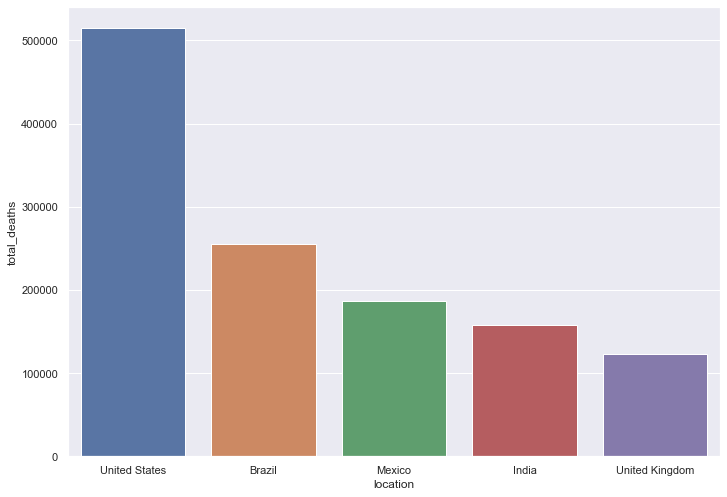

In [33]:

#top 5 quốc gia có số ca tử vong cao nhất
data_desc_death = data.sort_values(by='total_deaths', ascending=False)
top_death_5th = data_desc_death.head(5)
top_death_5th[['location','total_deaths']]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="location", y='total_deaths', data=top_death_5th, ci=0)

In [12]:
#Top 5 quốc gia có số ca nhiễm thấp nhất
data_asc = data.sort_values(by='total_cases')
bottom_5th = data_asc.head(5)
bottom_5th[['location','total_cases']]

,iso_code,location,continent,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,population,aged_70_older,population_70_older
55,FJI,Fiji,Oceania,59,65.816,2,2.231,896444,3.284,29439.0
64,GRD,Grenada,North America,148,1315.333,1,8.887,112519,5.021,5650.0
23,BRN,Brunei,Asia,186,425.159,3,6.857,437483,2.382,10421.0
155,TZA,Tanzania,Africa,509,8.521,21,0.352,59734213,1.874,1119419.0
101,MUS,Mauritius,Africa,619,486.724,10,7.863,1271767,5.884,74831.0


In [16]:
#Top 5 quốc gia có số ca nhiễm thấp nhất
data_asc = data.sort_values(by='total_deaths')
bottom_death_5th = data_asc.head(5)
bottom_death_5th[['location','total_deaths']]

,location,total_deaths
64,Grenada,1
18,Bhutan,1
55,Fiji,2
104,Mongolia,2
26,Burundi,3


In [28]:
# Top 5 quốc gia có tỉ lệ tử vong cao nhất
data['death_rate'] = data['total_deaths']/data['total_cases']
data_desc = data.sort_values(by='death_rate', ascending=False)
top_death_rate_5th = data_desc.head(5)

top_death_rate_5th[['location','death_rate']]

,location,death_rate
170,Yemen,0.274459
102,Mexico,0.089099
152,Syria,0.065976
148,Sudan,0.062245
48,Egypt,0.058663


In [13]:
data[data['location'] == 'Vietnam']
# Tìm vị trí của việt nam
# Lấy thêm bảng số liệu của VN
# Xây dựng mô hình hồi quy dự báo tỷ lệ chết 

,iso_code,location,continent,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,population,aged_70_older
169,VNM,Vietnam,Asia,2448,25.149,35,0.36,97338583,4.718
